<a href="https://colab.research.google.com/github/Hamsa-18/TNSIF_AIML_DBIT/blob/main/Capstone_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install -q scikit-learn pandas seaborn matplotlib joblib

In [36]:
from google.colab import files
uploaded = files.upload()
import io, os
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv
Uploaded: heart_disease_dataset (1).csv


In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
TEST_SIZE = 0.20
os.makedirs("figures", exist_ok=True)
os.makedirs("models", exist_ok=True)
def save_fig(fig, name):
    path = os.path.join("figures", name)
    fig.savefig(path, bbox_inches="tight")
    print("Saved:", path)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [38]:
df = pd.read_csv(filename)
print("Shape:", df.shape)
display(df.head())

possible_targets = [
    "heart_disease", "heart_desease", "target", "disease",
    "has_disease", "HeartDisease", "heart-disease"
]
target_col = None
for c in possible_targets:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    target_col = df.columns[-1]
    print(f"No standard target name found — using last column as target: '{target_col}'")

print("Using target column:", target_col)
print("\nTarget value counts:")
print(df[target_col].value_counts(dropna=False))

Shape: (400, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


Using target column: heart_disease

Target value counts:
heart_disease
1    222
0    178
Name: count, dtype: int64



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1

None


Missing values per column:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64
Saved: figures/target_distribution.png


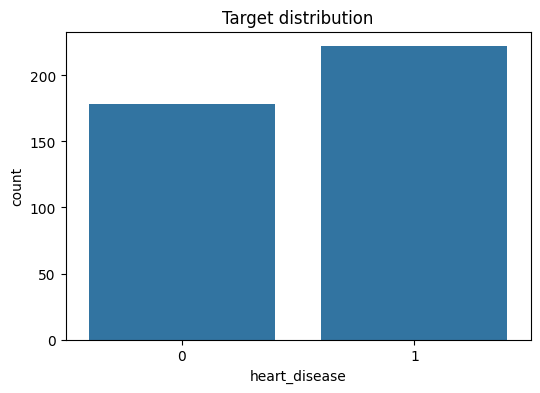

Saved: figures/correlation_matrix.png


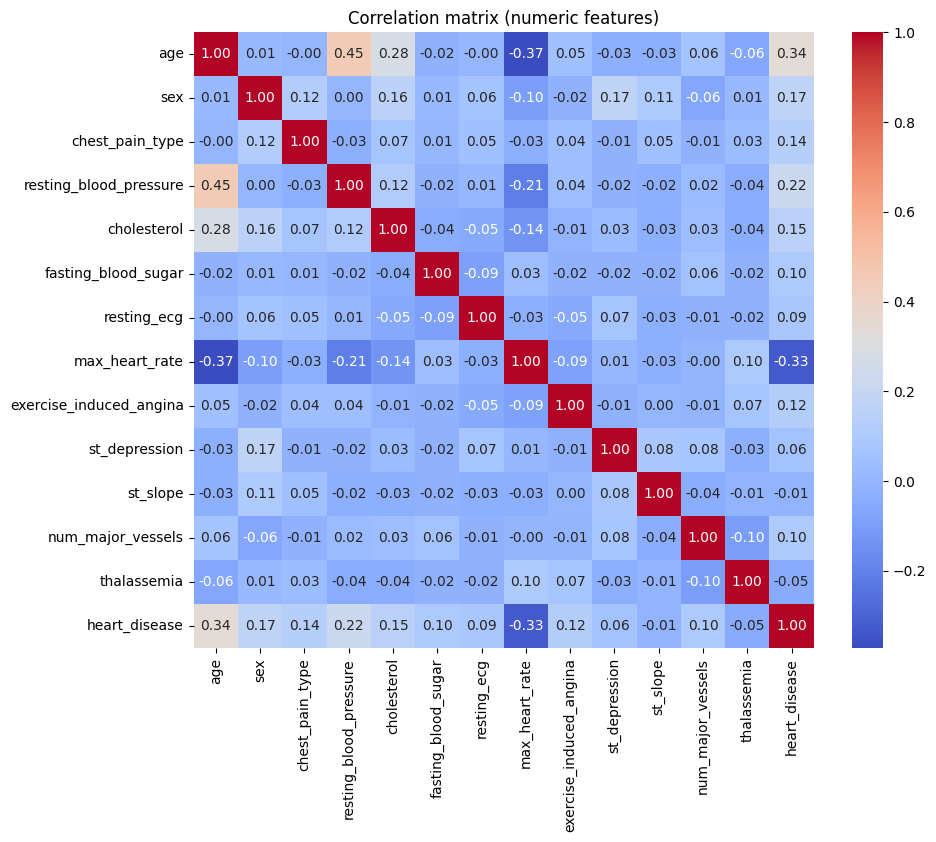

In [39]:
print("\n--- Info ---")
display(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=target_col, data=df, ax=ax)
ax.set_title("Target distribution")
save_fig(fig, "target_distribution.png")
plt.show()
num_df = df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation matrix (numeric features)")
save_fig(fig, "correlation_matrix.png")
plt.show()

In [40]:
X = df.drop(columns=[target_col])
y = df[target_col]

non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print("Converting non-numeric columns:", non_numeric)
    X = pd.get_dummies(X, columns=non_numeric, drop_first=True)

if X.isna().any().any():
    print("Filling missing values with median.")
    X = X.fillna(X.median())
feature_names = X.columns.tolist()
print("Features used:", feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "models/scaler.joblib")
print("Scaler saved to models/scaler.joblib")

Features used: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
Scaler saved to models/scaler.joblib


In [41]:
# Cell 6
models = {
    "LogisticRegression": LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "SVM": SVC(probability=True, random_state=RANDOM_STATE)
}

results = {}

for name, clf in models.items():
    print(f"\nTraining {name} ...")
    clf.fit(X_train_scaled, y_train)
    # predictions
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]  # all our models have predict_proba in config above

    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        "model": clf,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
    }

    print(f"{name} -> acc: {acc:.3f}, prec: {prec:.3f}, recall: {rec:.3f}, f1: {f1:.3f}, auc: {roc_auc:.3f}")


Training LogisticRegression ...
LogisticRegression -> acc: 0.675, prec: 0.696, recall: 0.727, f1: 0.711, auc: 0.734

Training DecisionTree ...
DecisionTree -> acc: 0.575, prec: 0.600, recall: 0.682, f1: 0.638, auc: 0.563

Training RandomForest ...
RandomForest -> acc: 0.675, prec: 0.688, recall: 0.750, f1: 0.717, auc: 0.762

Training SVM ...
SVM -> acc: 0.650, prec: 0.674, recall: 0.705, f1: 0.689, auc: 0.735


In [42]:
summary = []
for name, info in results.items():
    summary.append({
        "model": name,
        "accuracy": info["accuracy"],
        "precision": info["precision"],
        "recall": info["recall"],
        "f1": info["f1"],
        "roc_auc": info["roc_auc"]
    })

summary_df = pd.DataFrame(summary).sort_values(by="recall", ascending=False).reset_index(drop=True)
display(summary_df)
summary_df.to_csv("models/model_comparison_summary.csv", index=False)
print("Saved model comparison -> models/model_comparison_summary.csv")
best_name = summary_df.iloc[0]["model"]
best_model = results[best_name]["model"]
print("Best model chosen by recall:", best_name)

joblib.dump(best_model, f"models/best_model_{best_name}.joblib")
print(f"Saved best model to models/best_model_{best_name}.joblib")

,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.675,0.687500,0.750000,0.717391,0.761679
1,LogisticRegression,0.675,0.695652,0.727273,0.711111,0.734217
2,SVM,0.650,0.673913,0.704545,0.688889,0.735480
3,DecisionTree,0.575,0.600000,0.681818,0.638298,0.563131


Saved model comparison -> models/model_comparison_summary.csv
Best model chosen by recall: RandomForest
Saved best model to models/best_model_RandomForest.joblib


ROC plot saved to figures/roc_comparison.png


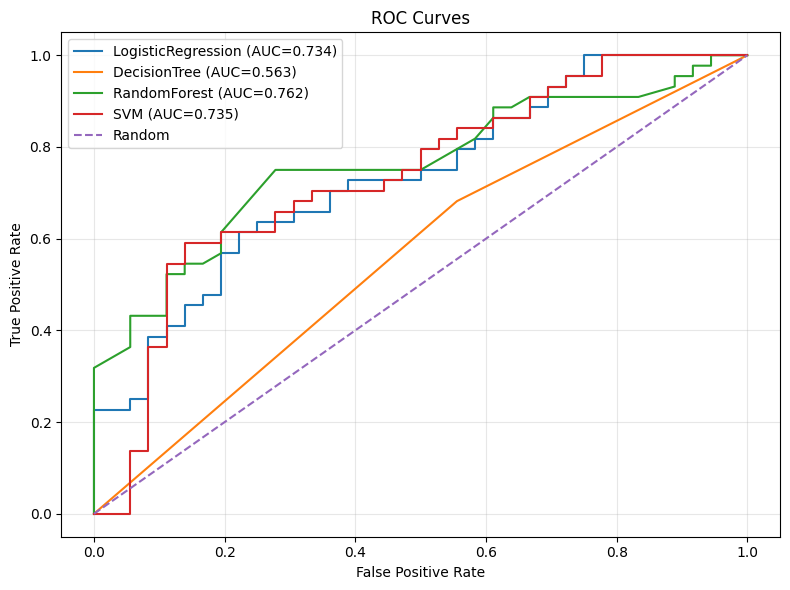

In [43]:
plt.figure(figsize=(8,6))
for name, info in results.items():
    model = info["model"]
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/roc_comparison.png", bbox_inches="tight")
print("ROC plot saved to figures/roc_comparison.png")
plt.show()

In [44]:
from pprint import pprint
best_info = results[best_name]
print("Classification report for", best_name)
pprint(best_info["classification_report"])
print("\nConfusion matrix:")
print(np.array(best_info["confusion_matrix"]))

Classification report for RandomForest
{'0': {'f1-score': 0.6176470588235294,
       'precision': 0.65625,
       'recall': 0.5833333333333334,
       'support': 36.0},
 '1': {'f1-score': 0.717391304347826,
       'precision': 0.6875,
       'recall': 0.75,
       'support': 44.0},
 'accuracy': 0.675,
 'macro avg': {'f1-score': 0.6675191815856778,
               'precision': 0.671875,
               'recall': 0.6666666666666667,
               'support': 80.0},
 'weighted avg': {'f1-score': 0.6725063938618925,
                  'precision': 0.6734375,
                  'recall': 0.675,
                  'support': 80.0}}

Confusion matrix:
[[21 15]
 [11 33]]


In [45]:
from google.colab import files
# Download the best model and scaler
files.download(f"models/best_model_{best_name}.joblib")
files.download("models/scaler.joblib")
files.download("models/model_comparison_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>